In [36]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

import seaborn as sns

import wf_psf as wf



In [3]:


args = {
    'id_name': '_wf_PR_NewPRoj_12_cycles_v2' ,
    'suffix_id_name': 'v2' ,
    'base_id_name': '_wf_PR_NewPRoj_12_cycles_' ,
    'eval_only_param': False ,
    'total_cycles': 12 ,
    'saved_cycle': 'cycle12' ,
    'reset_dd_features': True ,
    'eval_only_param': False ,
    'project_dd_features': True ,
    'd_max': 2 ,
    'n_zernikes': 45 ,
    'save_all_cycles': True ,
    'n_bins_lda': 8,
    'n_bins_gt': 8,
    'output_dim': 32,
    'batch_size': 32,
    'oversampling_rate': 3.,
    'output_q': 3.,
    'sed_sigma': 0.,
    'x_lims': [0, 1e3],
    'y_lims': [0, 1e3],
    'sed_interp_kind': 'linear',
    'interp_pts_per_bin': 0,
    'extrapolate': True,
    'opt_stars_rel_pix_rmse': True ,
    'eval_mono_metric_rmse': False,
    'eval_opd_metric_rmse': True,
    'eval_train_shape_sr_metric_rmse': True,
    'pupil_diameter': 256 ,
    'n_epochs_param_multi_cycle': "0" ,
    'n_epochs_non_param_multi_cycle': "75" ,
    'l_rate_non_param_multi_cycle': "0.1" ,
    'l_rate_param_multi_cycle': "0" ,
    'l_rate_param': None,
    'l_rate_non_param': None,
    'n_epochs_param': None,
    'n_epochs_non_param': None,
    'model': 'poly' ,
    'model_eval': 'poly' ,
    'cycle_def': 'complete' ,
    'gt_n_zernikes': 45 ,
    'd_max_nonparam': 5 ,
    'saved_model_type': 'external' ,
    'use_sample_weights': True ,
    'l2_param': 0. ,
    'interpolation_type': 'none' ,
    'eval_batch_size': 16 ,
    'train_opt': True ,
    'eval_opt': True ,
    'plot_opt': True ,
    'dataset_folder': '/disk/xray0/tl3/datasets/wf-phase-retrieval/data/',
    'test_dataset_file': 'test_Euclid_res_id_010_8_bins.npy',
    'train_dataset_file': 'train_Euclid_res_2000_TrainStars_id_010_8_bins.npy',
    'base_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/',
    'metric_base_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/metrics/',
    'chkp_save_path': '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/chkp/chkp_callback_poly_wf_PR_NewPRoj_12_cycles_v2_cycle%d',
    'plots_folder': 'plots/' ,
    'model_folder': 'chkp/' ,
    'log_folder': 'log-files/' ,
    'optim_hist_folder': 'optim-hist/' ,
    'star_numbers': 1 ,
}


In [4]:
base_path = '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/'
log_folder = 'log-files/'
metric_base_path = '/disk/xray0/tl3/outputs/wf-phase-retrieval/wf-outputs/metrics/'


# base_id_name = '_wf_PR_12_cycles_v1_'
# eval_cycle = 'cycle1'

args['base_path'] = base_path
args['log_folder'] = log_folder
args['metric_base_path'] = metric_base_path


save_dir = '/disk/xray0/tl3/repos/wf-psf/experiments/phase-retrieval-optical-prior/plots/poster_plots/'



In [5]:
metrics_base_id_name_list = [
    'metrics-poly_wf_PR_NewPRoj_12_cycles_v2',
    'only_param_eval/metrics-poly_wf_PR_NewPRoj_12_cycles_v2',
]

eval_cycle_base_id_list = [12,12]#,12,18,18,16,12,14]
metrics = []
it = 0
# Iterate over the base_ids
for base_id, total_cycles in zip(metrics_base_id_name_list, eval_cycle_base_id_list):
    # Define the list of cycles
    eval_cycle_list = np.arange(1,total_cycles+1)
    metrics.append([])
    # Iterate over the cycles
    for eval_cycle in eval_cycle_list:
        loaded_metrics = np.load(
            args['metric_base_path'] + base_id + 'cycle' + str(eval_cycle) + '.npy' ,
            allow_pickle=True
        )[()]
        metrics[it].append(loaded_metrics)

    it += 1


In [6]:

metrics[0][0]['test_metrics'].keys()


dict_keys(['poly_metric', 'mono_metric', 'opd_metric', 'shape_results_dict'])

In [70]:
def define_plot_style():
    # Define plot paramters
    plot_style = {
        'figure.figsize': (12, 8),
        'figure.dpi': 200,
        'figure.autolayout': True,
        'lines.linewidth': 3,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 12,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 16
    }
    mpl.rcParams.update(plot_style)
    # Use seaborn style
    sns.set()

define_plot_style()

In [8]:


metrics[0][0]['test_metrics'].keys()

metrics[0][0]['test_metrics']['shape_results_dict'].keys()

dict_keys(['pred_e1_HSM', 'pred_e2_HSM', 'pred_R2_HSM', 'GT_pred_e1_HSM', 'GT_ped_e2_HSM', 'GT_pred_R2_HSM', 'rmse_e1', 'std_rmse_e1', 'rel_rmse_e1', 'std_rel_rmse_e1', 'rmse_e2', 'std_rmse_e2', 'rel_rmse_e2', 'std_rel_rmse_e2', 'rmse_R2_meanR2', 'std_rmse_R2_meanR2', 'pix_rmse', 'pix_rmse_std', 'rel_pix_rmse', 'rel_pix_rmse_std', 'output_Q', 'output_dim', 'n_bins_lda', 'stars_rel_pix_rmse'])

In [9]:
# Extract results

# Extract OPD results
test_opd_rel_results = []
train_opd_rel_results = []
# Extract pix resutls
test_pix_rel_results = []
train_pix_rel_results = []
# Extract SR pix resutls
test_SR_pix_rel_results = []
train_SR_pix_rel_results = []

for it_1 in range(len(metrics)):
    test_opd_rel_results.append([])
    train_opd_rel_results.append([])

    test_pix_rel_results.append([])
    train_pix_rel_results.append([])

    test_SR_pix_rel_results.append([])
    train_SR_pix_rel_results.append([])

    for it_2 in range(len(metrics[it_1])):

        test_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['opd_metric']['rel_rmse_opd']
        )
        train_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['opd_metric']['rel_rmse_opd']
        )
        
        test_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['poly_metric']['rel_rmse']
        )
        train_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['poly_metric']['rel_rmse']
        )

        test_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['shape_results_dict']['rel_pix_rmse']
        )
        train_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['shape_results_dict']['rel_pix_rmse']
        )



In [28]:
labels = [
    'Full model',
    'Parametric part',
]



## OPD error

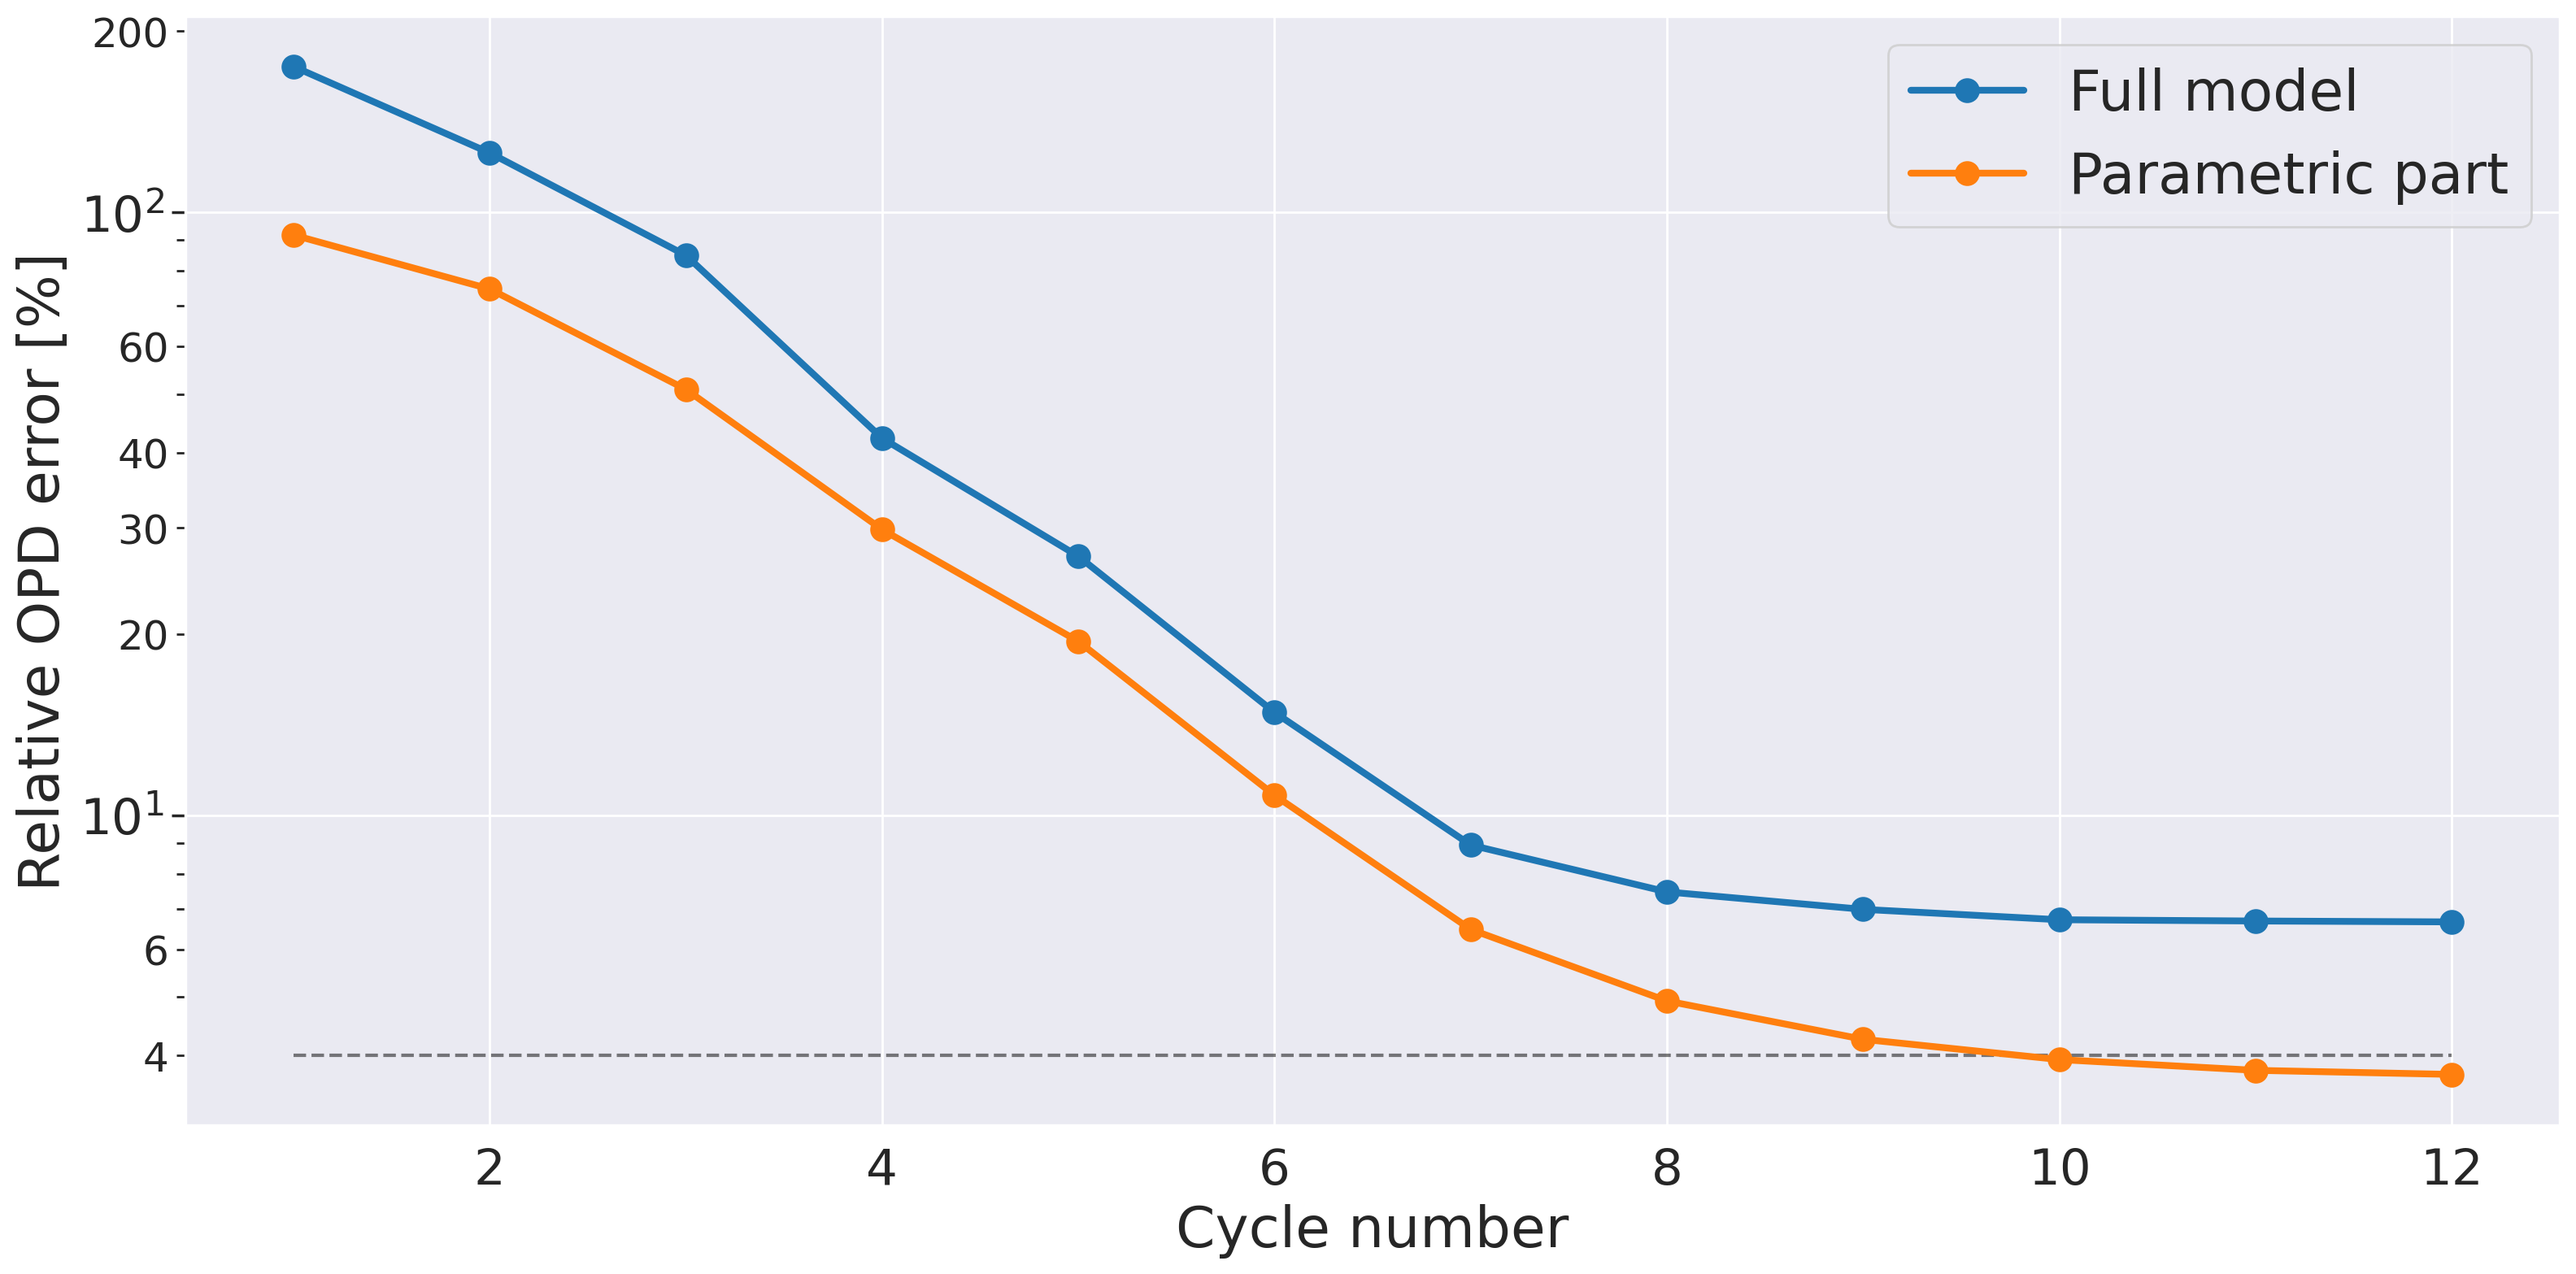

In [108]:
# OPD
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()

plt.plot(
    np.arange(1,len(test_opd_rel_results[0])+1),
    4. * np.ones(len(test_opd_rel_results[0])),
    color='black',
    linestyle='--',
    marker='',
    alpha=0.5
)

for it, res in enumerate(test_opd_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=10,
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative OPD error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3, 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
plt.savefig(
    '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_opd_error.pdf'),
    bbox_inches='tight',
    dpi=300
)
plt.show()



## Observation resolution

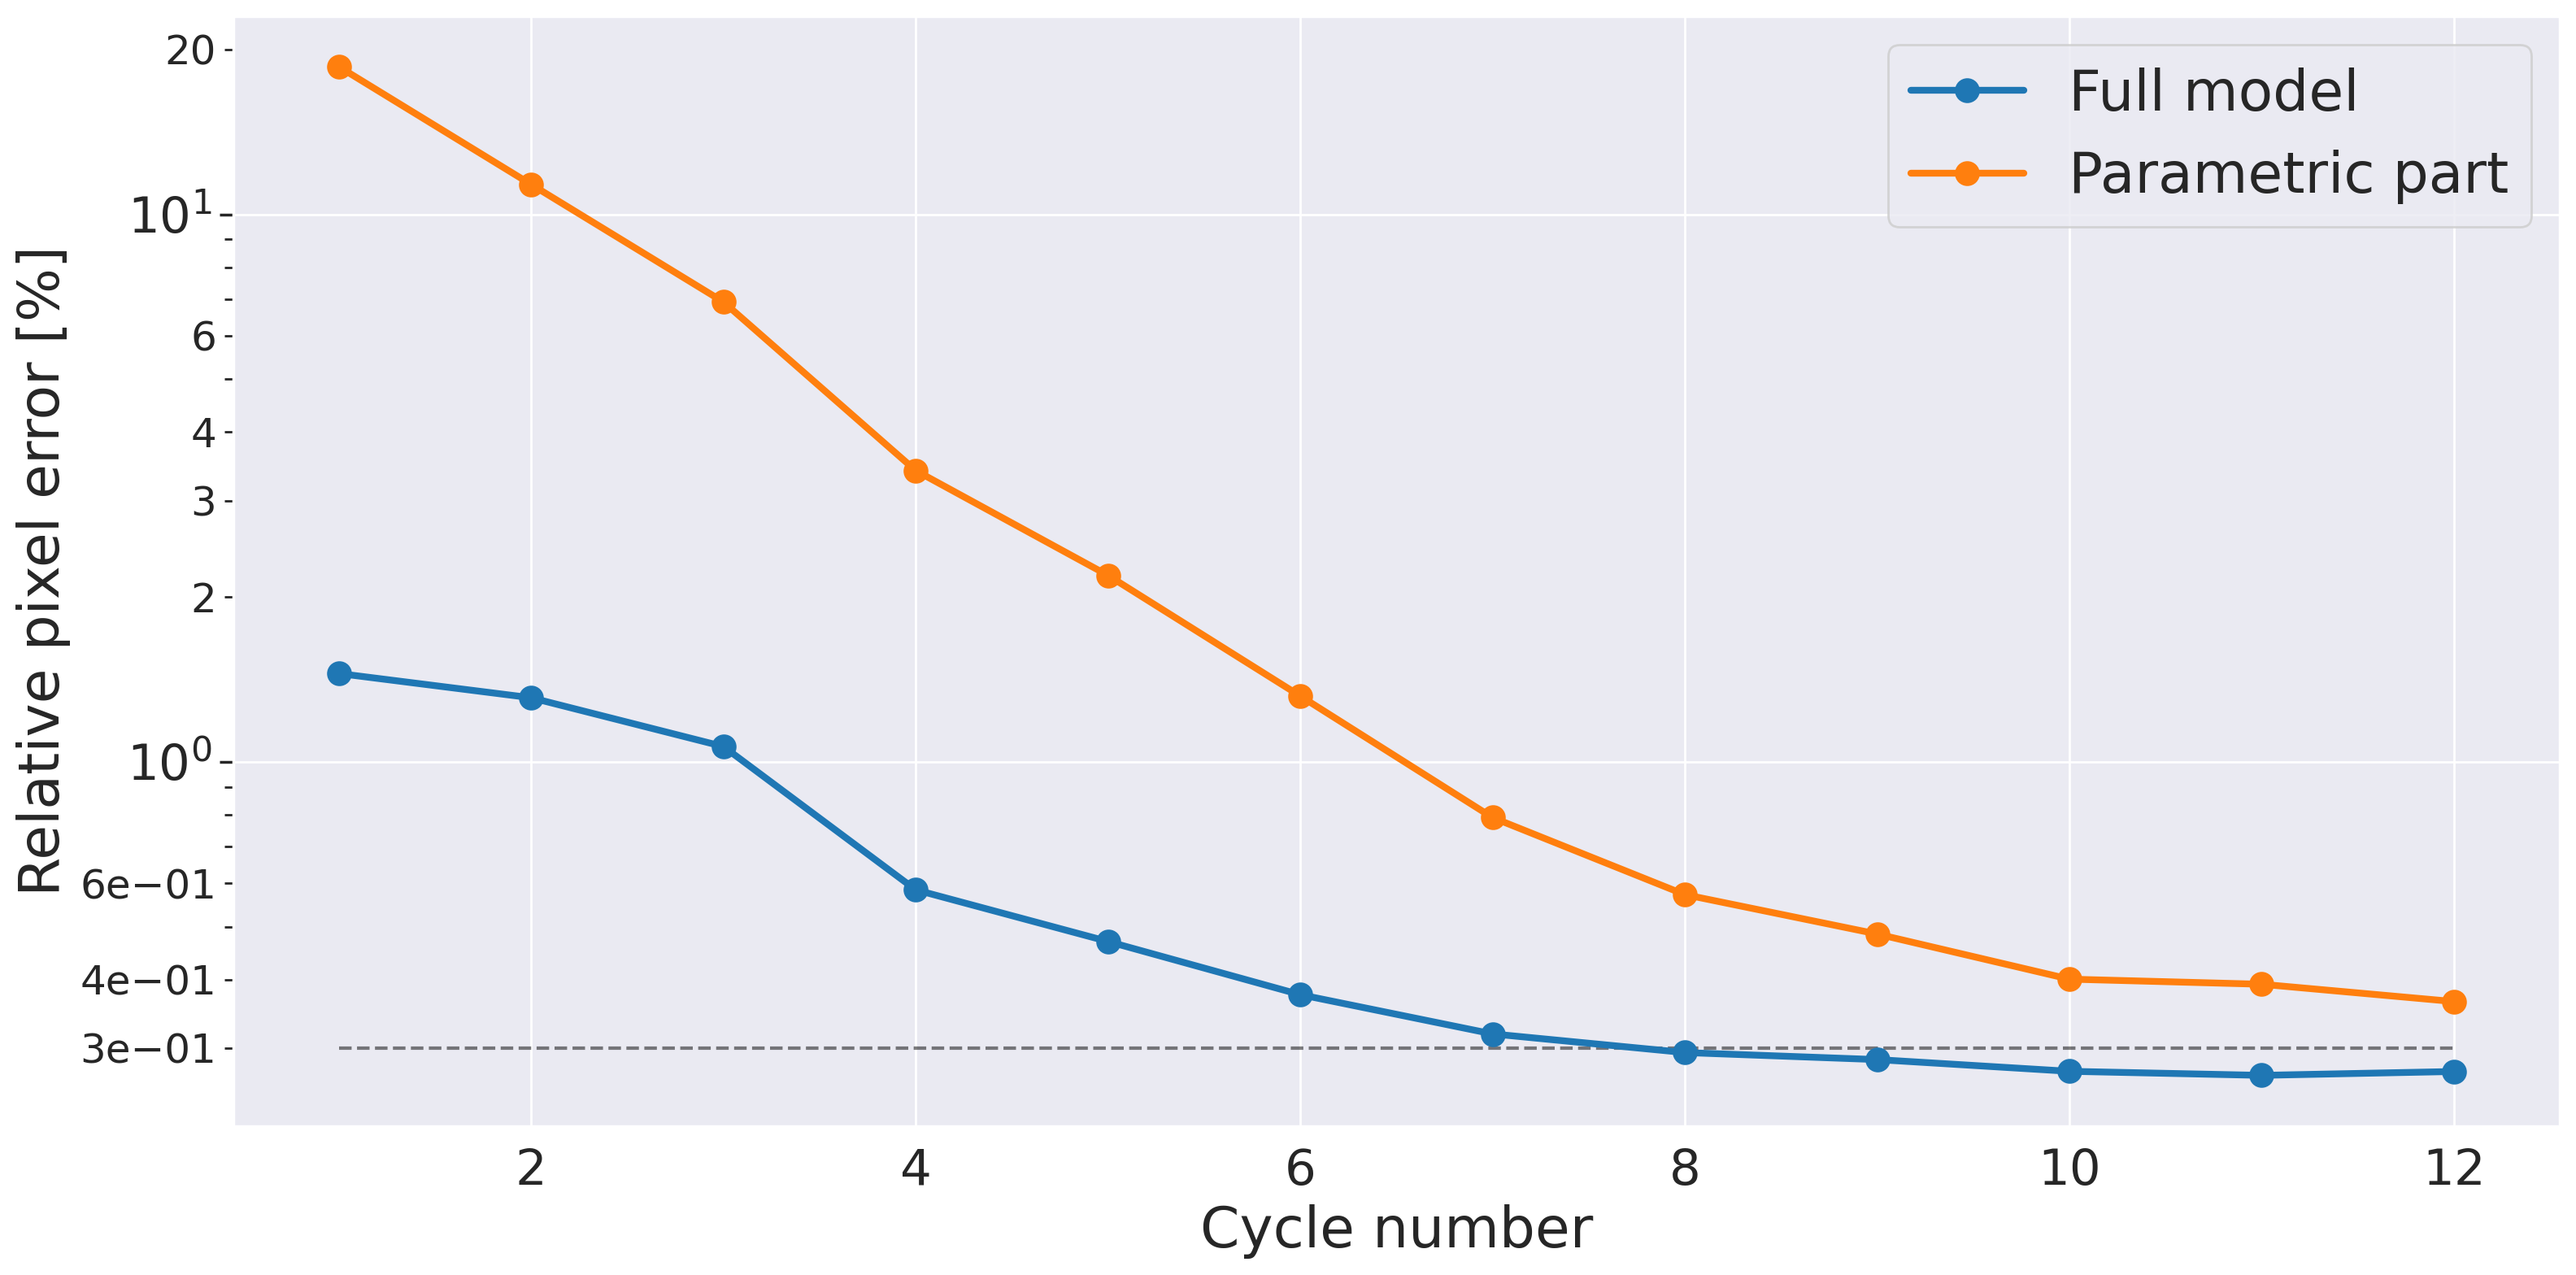

In [109]:

# Pixel
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()

plt.plot(
    np.arange(1,len(test_pix_rel_results[0])+1),
    0.3 * np.ones(len(test_pix_rel_results[0])),
    color='black',
    linestyle='--',
    marker='',
    alpha=0.5
)

for it, res in enumerate(test_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=10,
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))

ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
plt.savefig(
    '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_obsRes.pdf'),
    bbox_inches='tight',
    dpi=300
)
plt.show()




## Super resolution

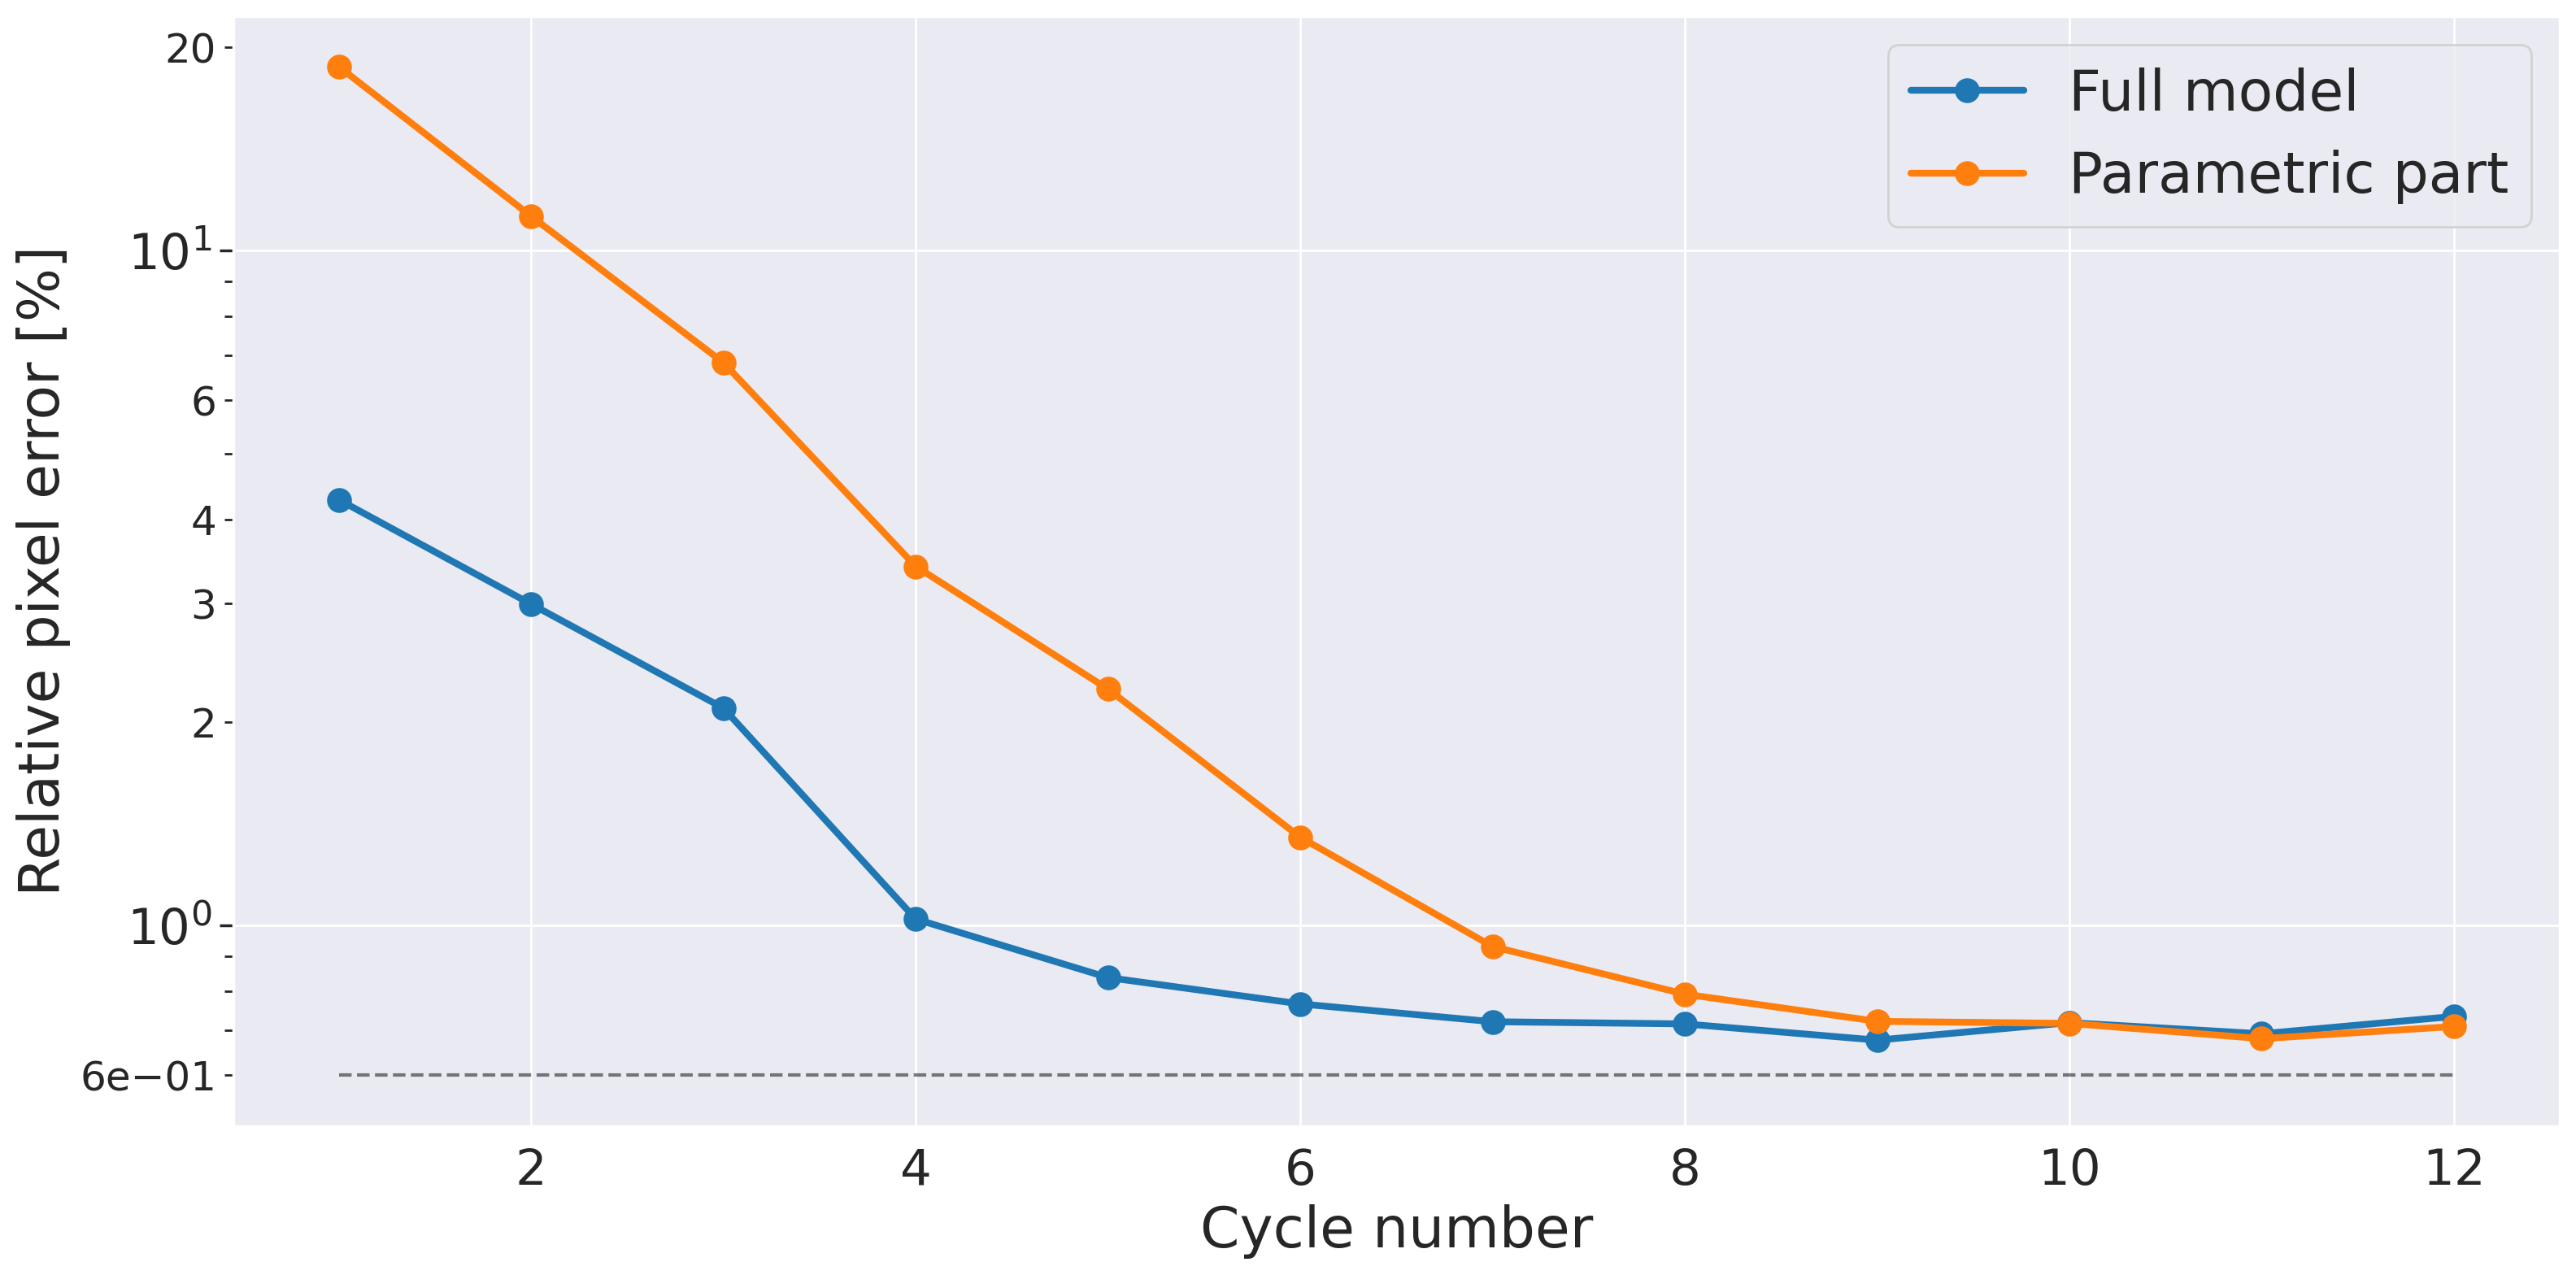

In [110]:


# SR Pixel
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()

plt.plot(
    np.arange(1,len(test_SR_pix_rel_results[0])+1),
    0.6 * np.ones(len(test_SR_pix_rel_results[0])),
    color='black',
    linestyle='--',
    marker='',
    alpha=0.5
)

for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=10,
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)

ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
plt.savefig(
    '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_SuperRes.pdf'),
    bbox_inches='tight',
    dpi=300
)
plt.show()



## Both resolutions

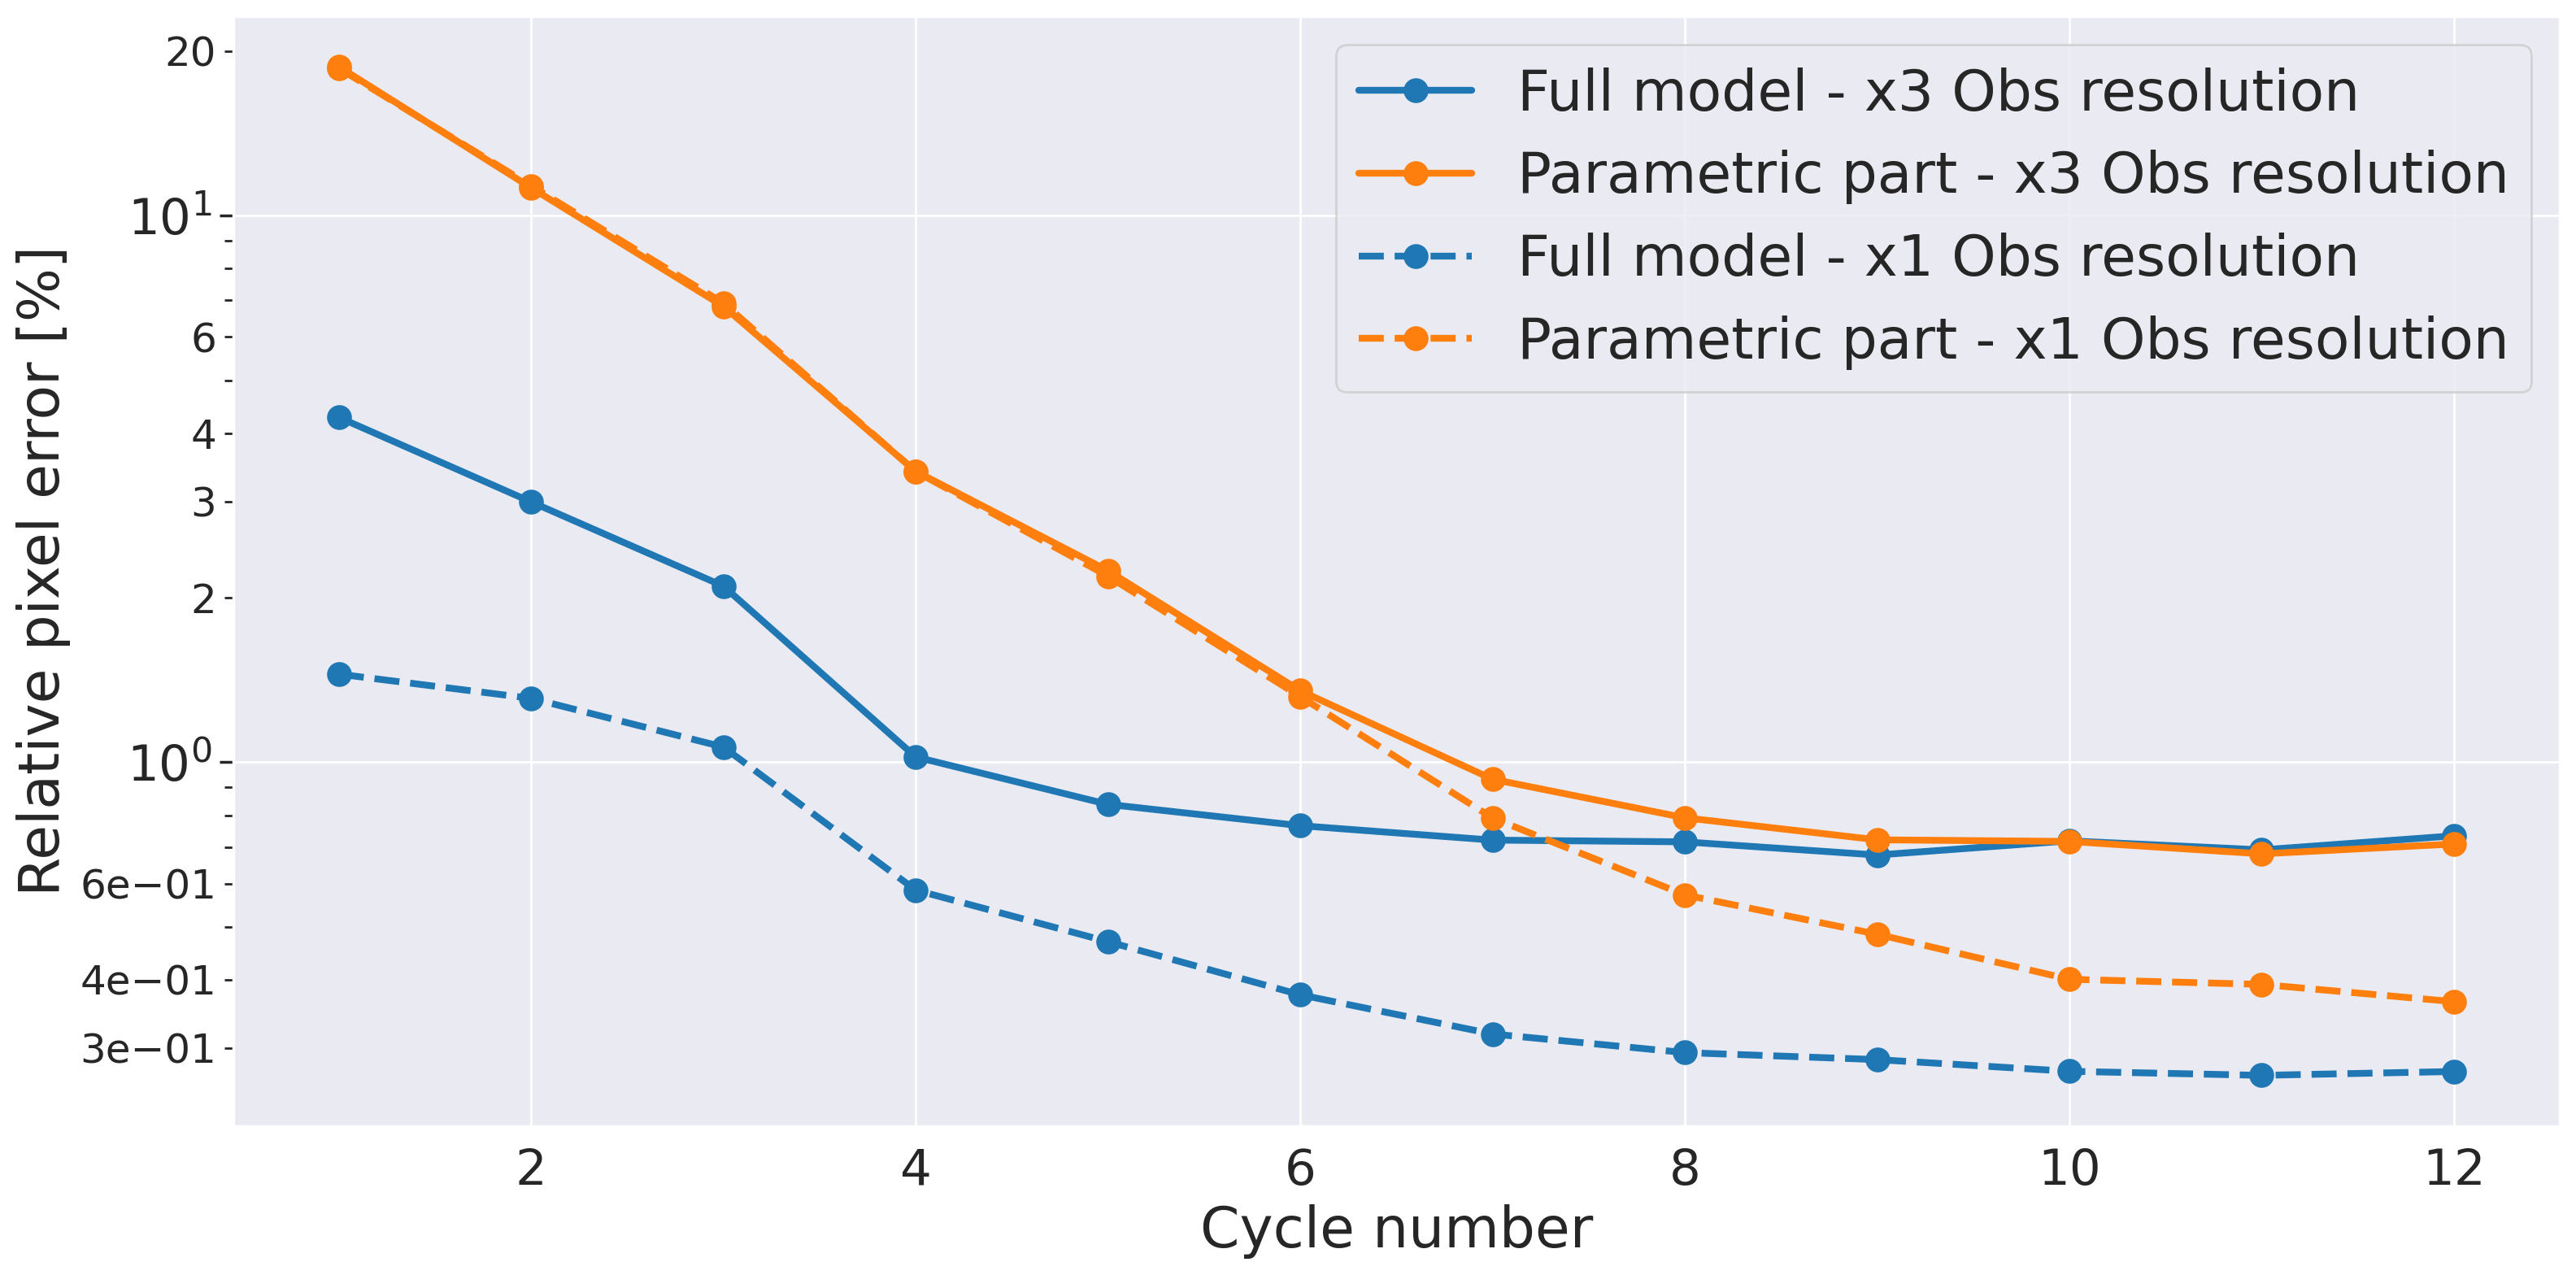

In [111]:
labels_SR = [
    'Full model - x3 Obs resolution',
    'Parametric part - x3 Obs resolution',
]
labels_obsR = [
    'Full model - x1 Obs resolution',
    'Parametric part - x1 Obs resolution',
]

# Both pixel resolutions
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(16,8))
ax = plt.gca()


for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels_SR[it],
        linewidth=3,
        markersize=10,
    )

for it, res in enumerate(test_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels_obsR[it],
        linestyle='dashed',
        linewidth=3,
        markersize=10,
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)

ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
plt.savefig(
    '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_bothRes.pdf'),
    bbox_inches='tight',
    dpi=300
)
plt.show()

